In [ ]:
# Install the ultralytics package from PyPI
!pip install ultralytics --quiet

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="CKm7JIErPf0WgQG1lDcv")
project = rf.workspace("lb-kemur").project("rock-paper-scissors-sxsw-ricgj")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-1 in yolov8:: 100%|██████████| 6270/6270 [00:01<00:00, 6193.78it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")


In [ ]:
model.train(
    data="/content/datasets/rock-paper-scissors-1/data.yaml",
    epochs = 30,
    imgsz = 640,
    batch = 16
)

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/rock-paper-scissors-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be65c6c5eb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
from IPython.display import Image

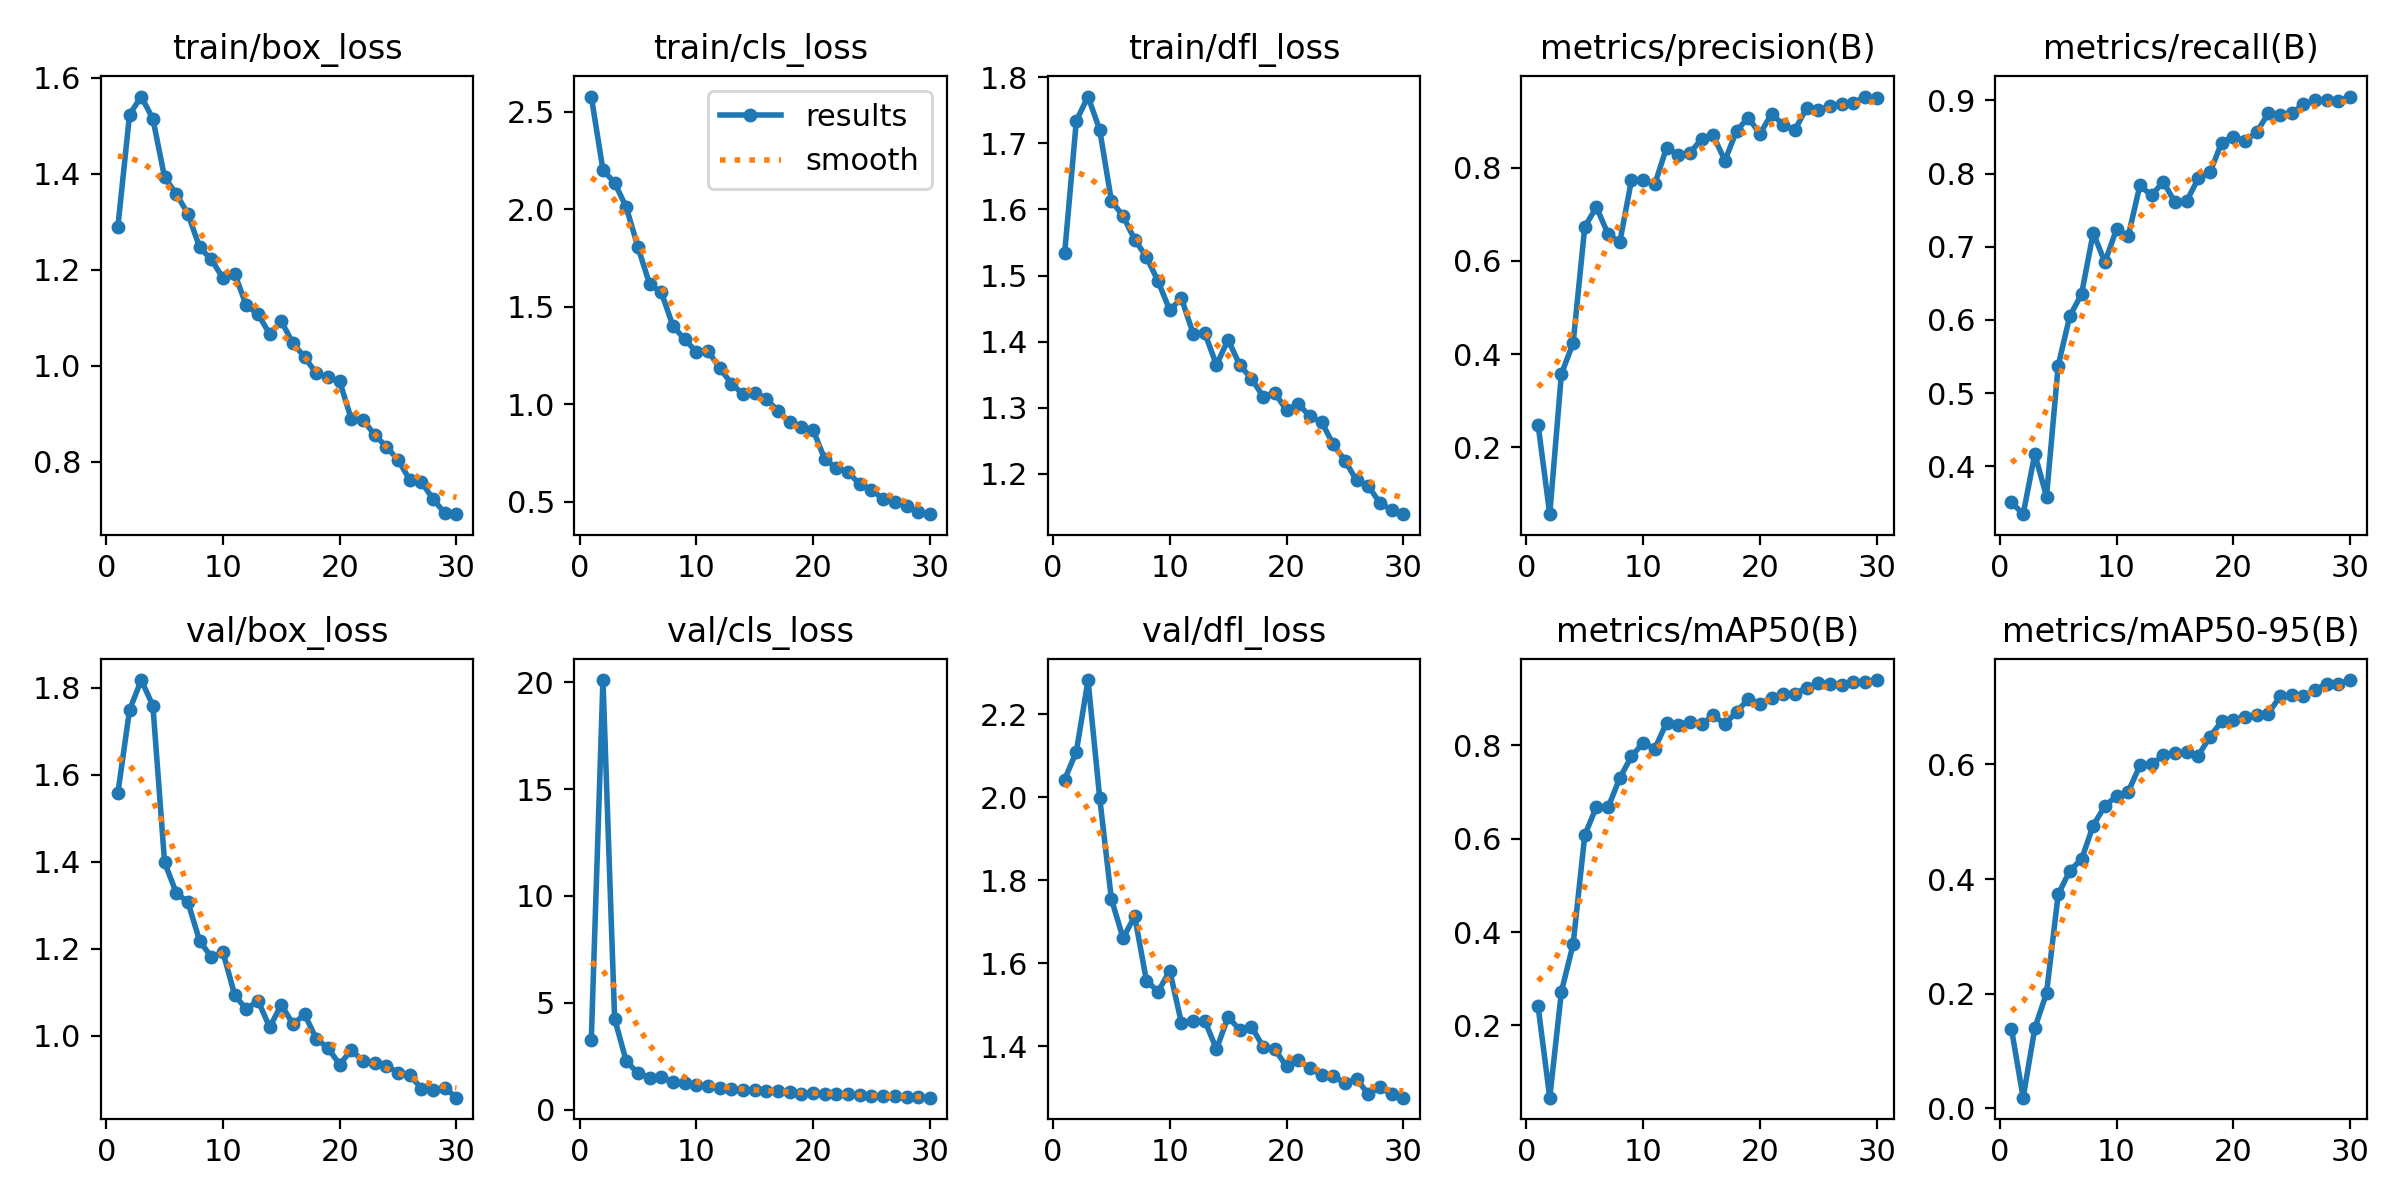

In [ ]:
Image("/content/runs/detect/train3/results.png")

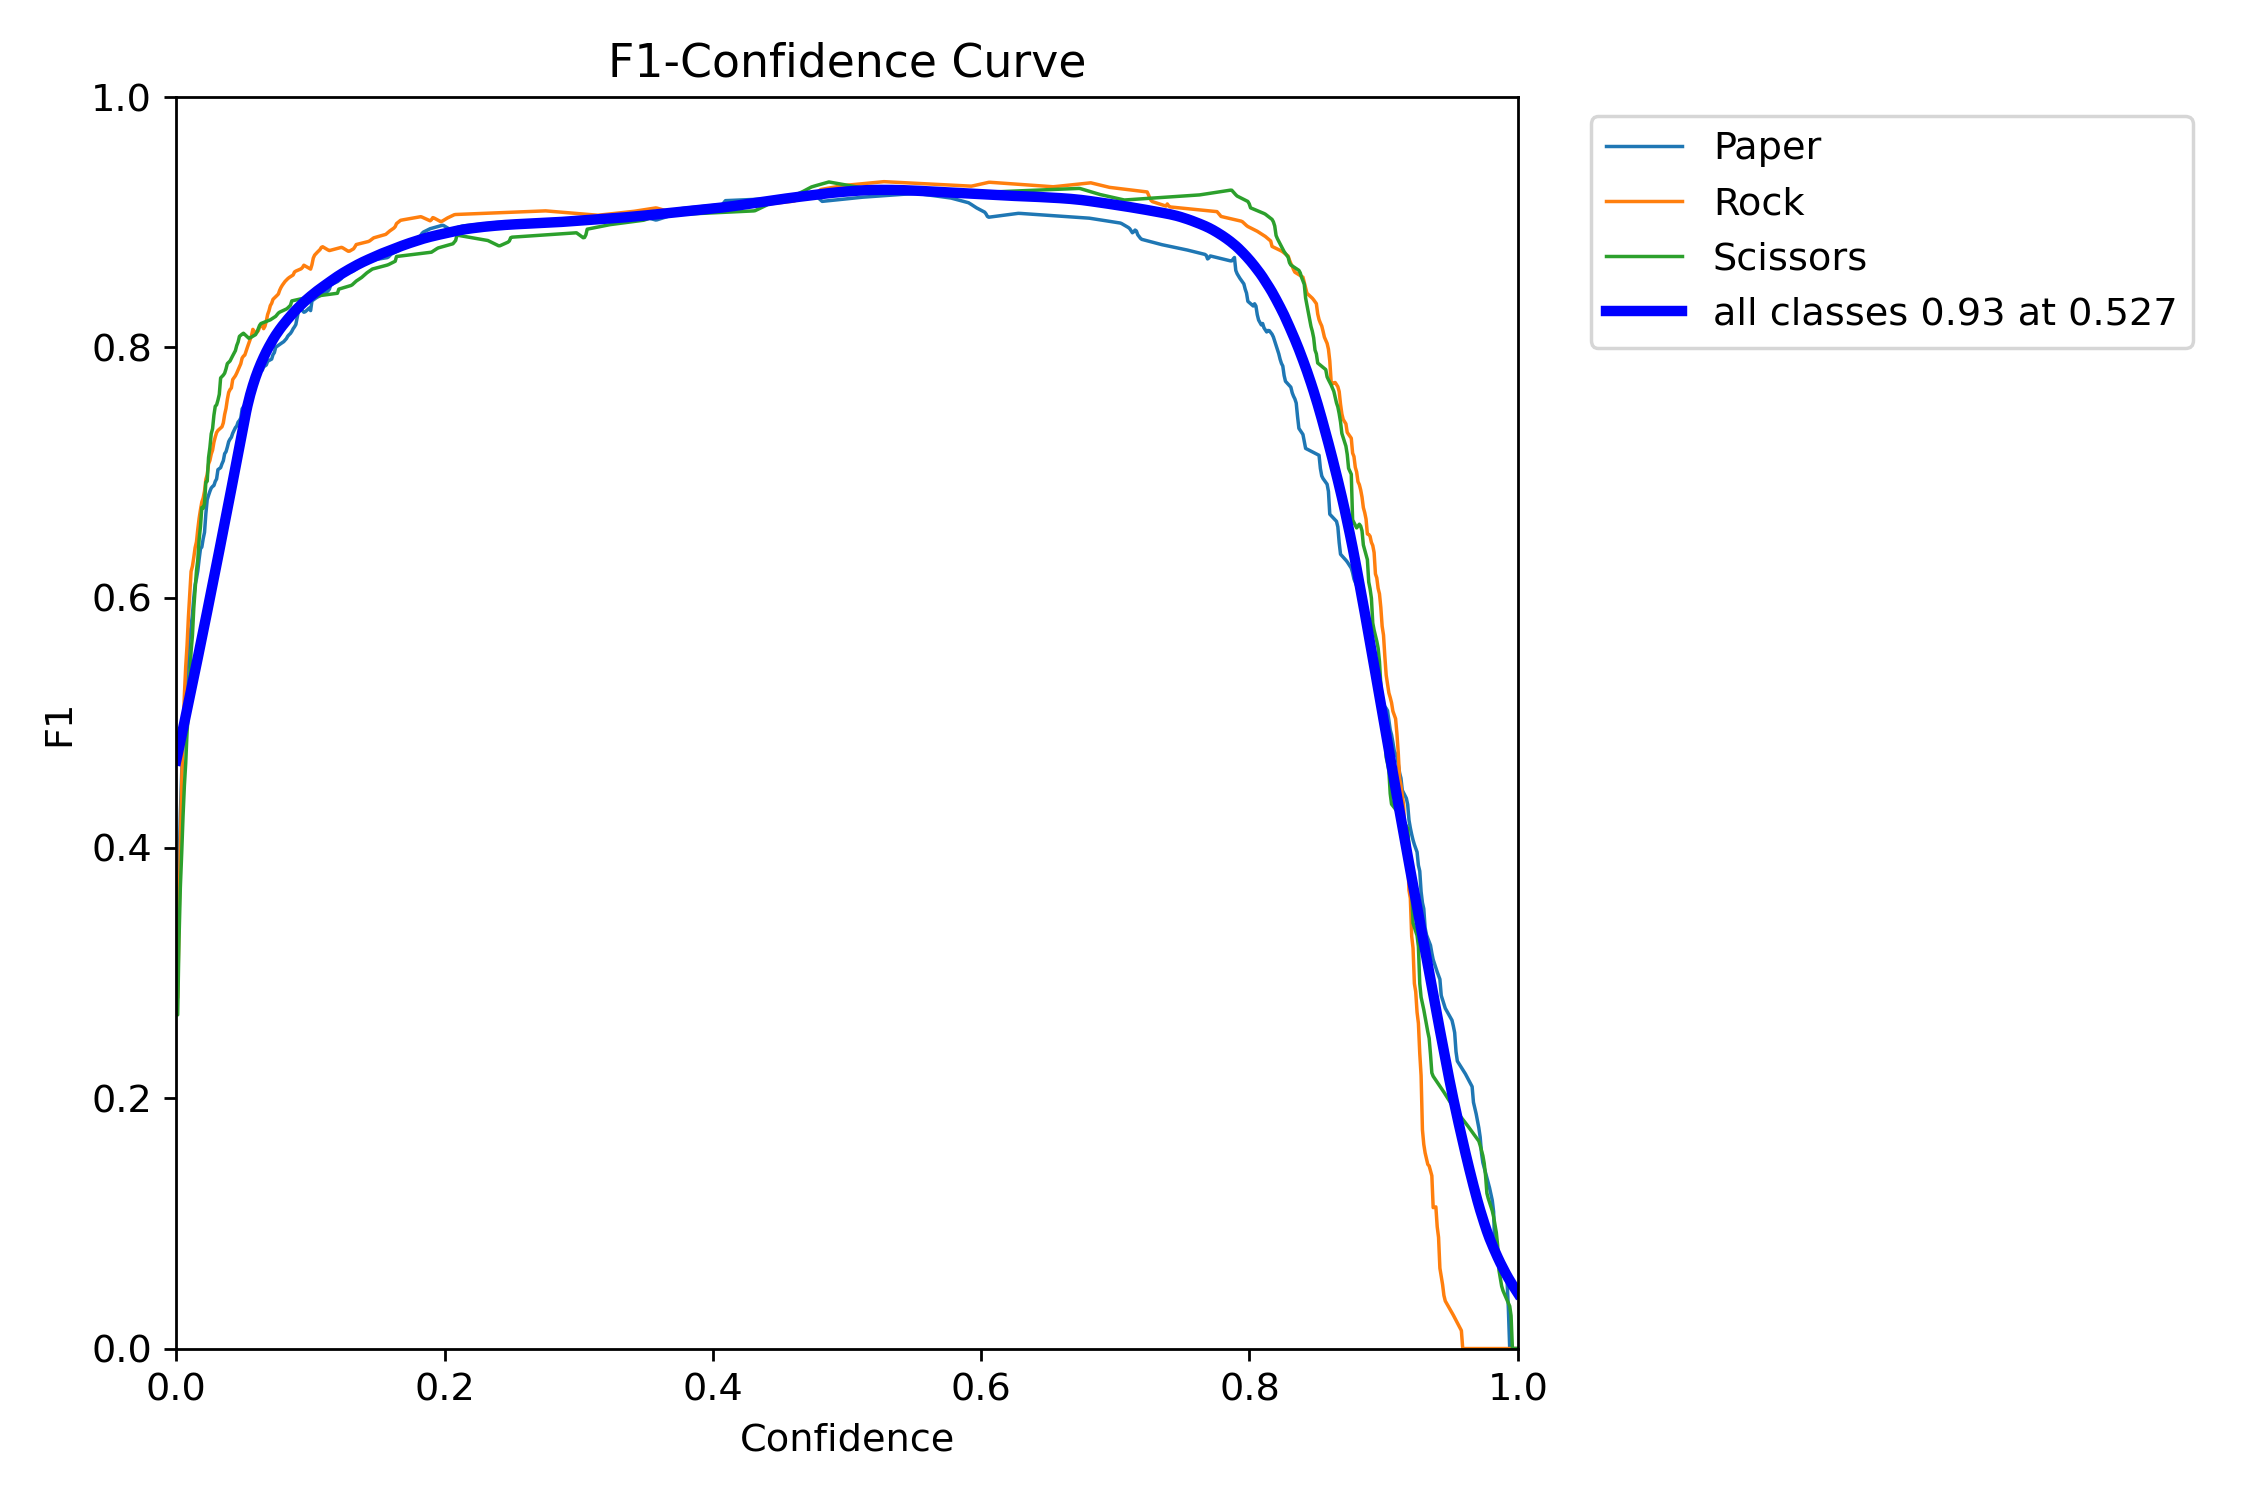

In [ ]:
Image("/content/runs/detect/train3/BoxF1_curve.png")

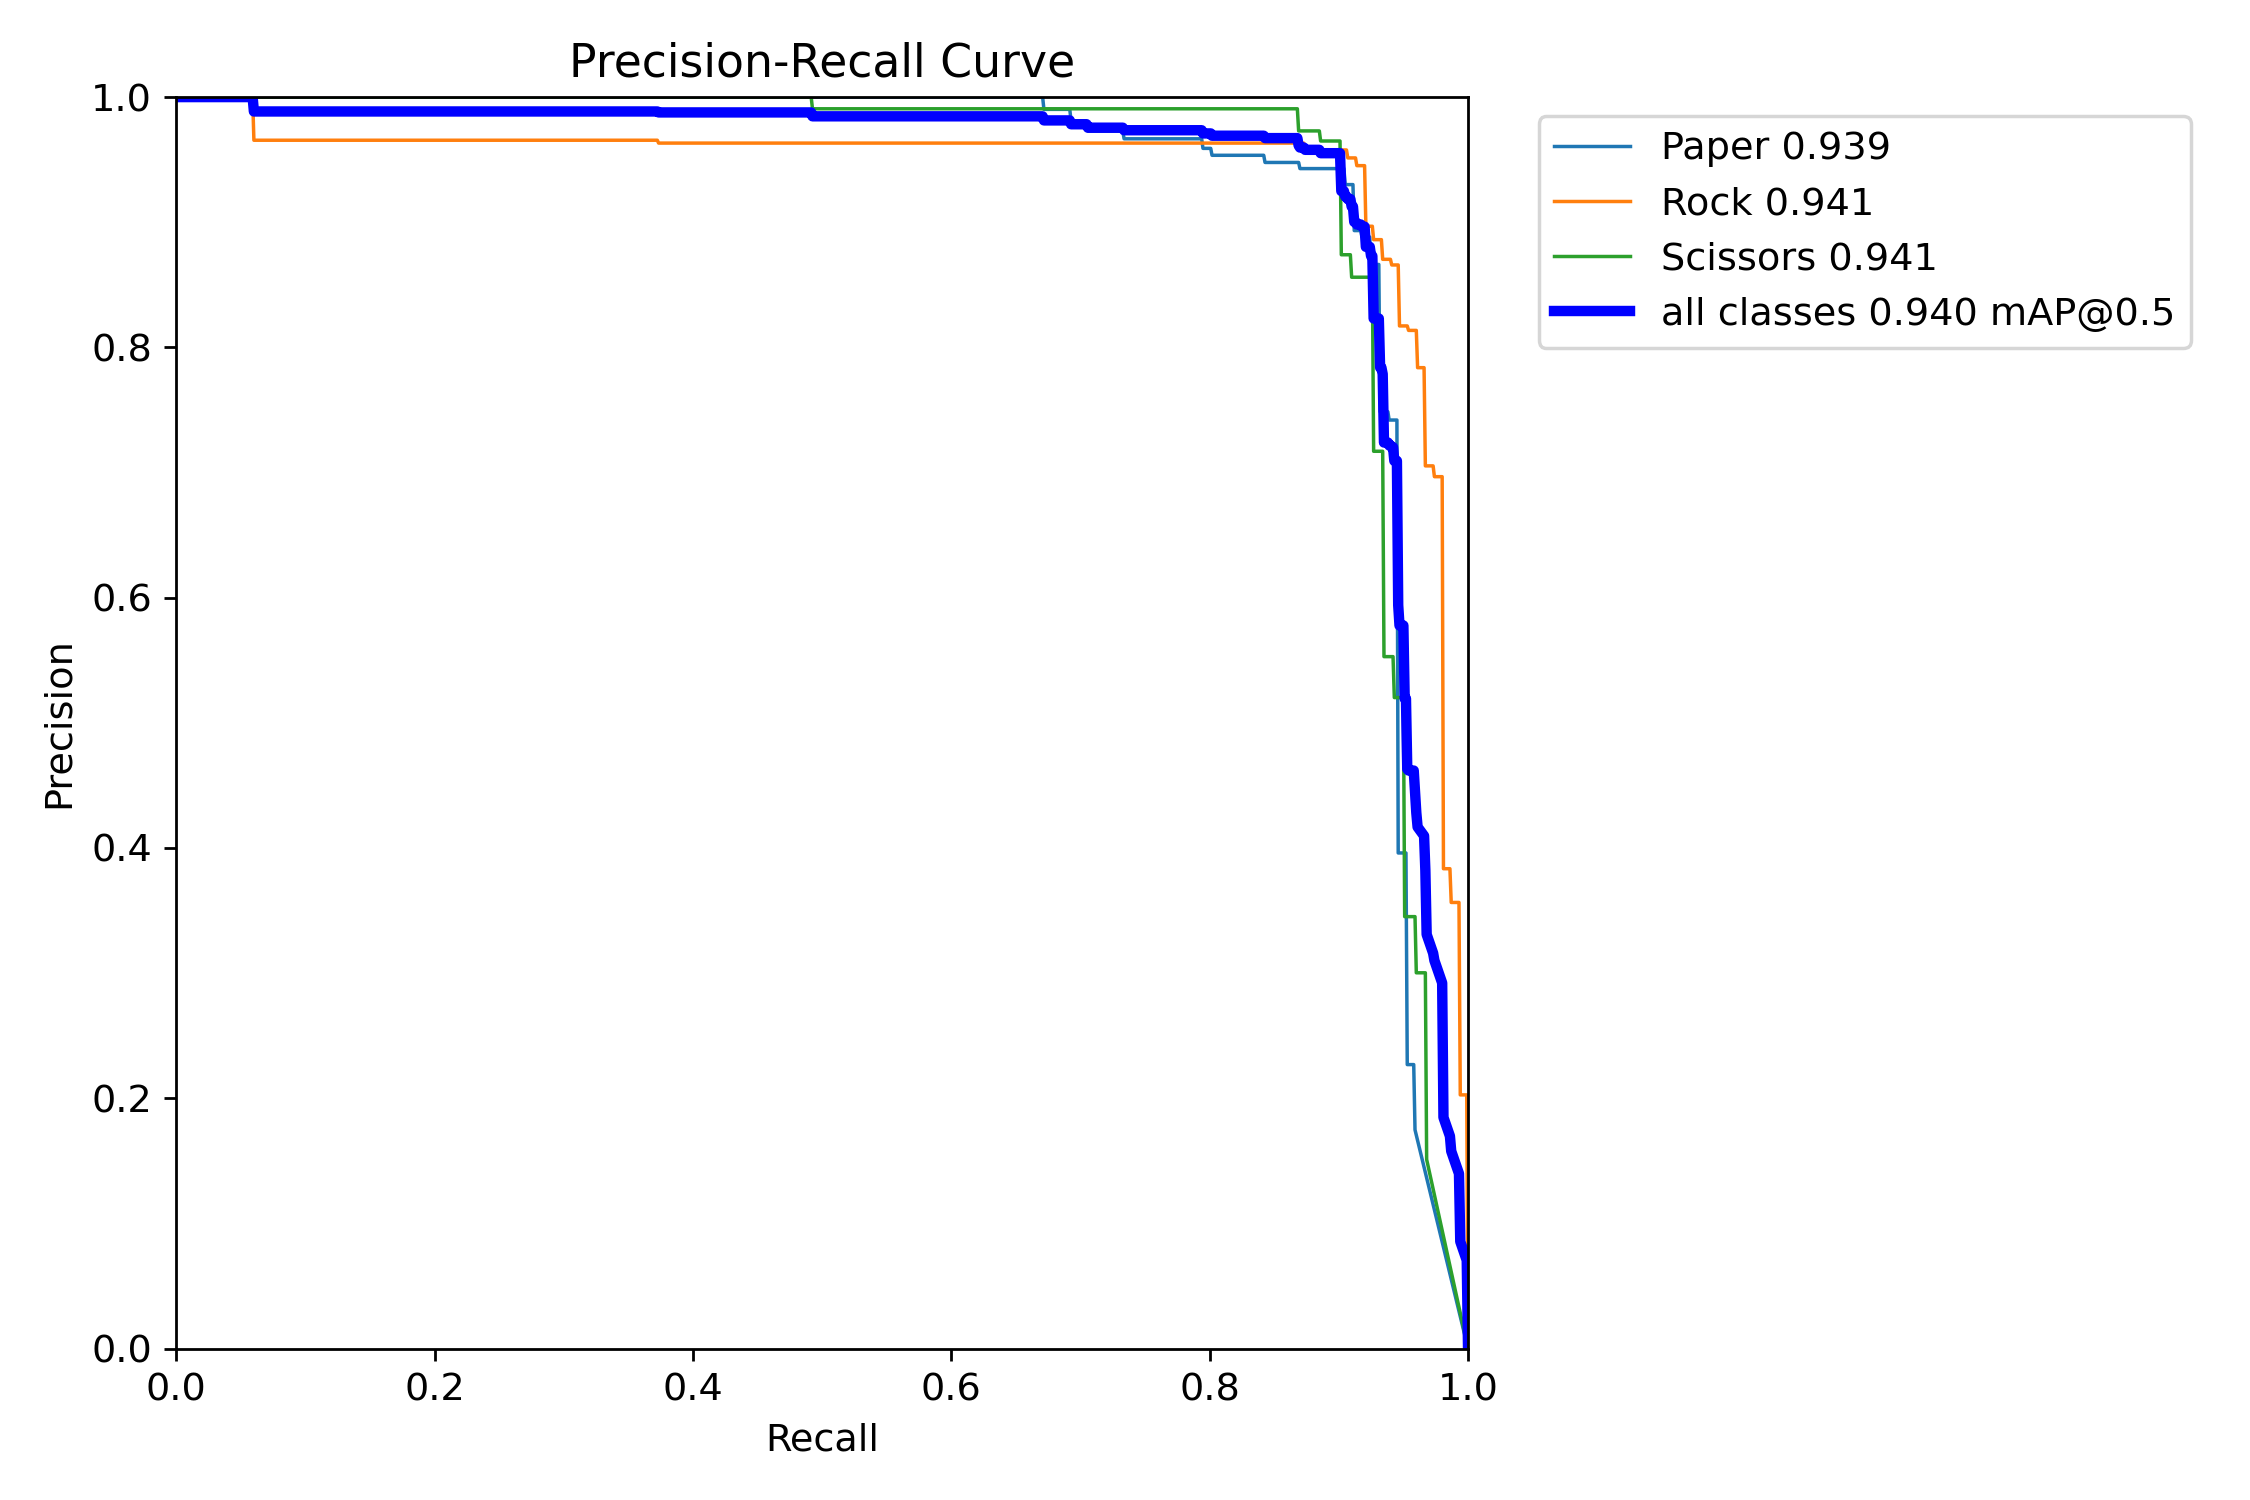

In [ ]:
Image("/content/runs/detect/train3/BoxPR_curve.png")

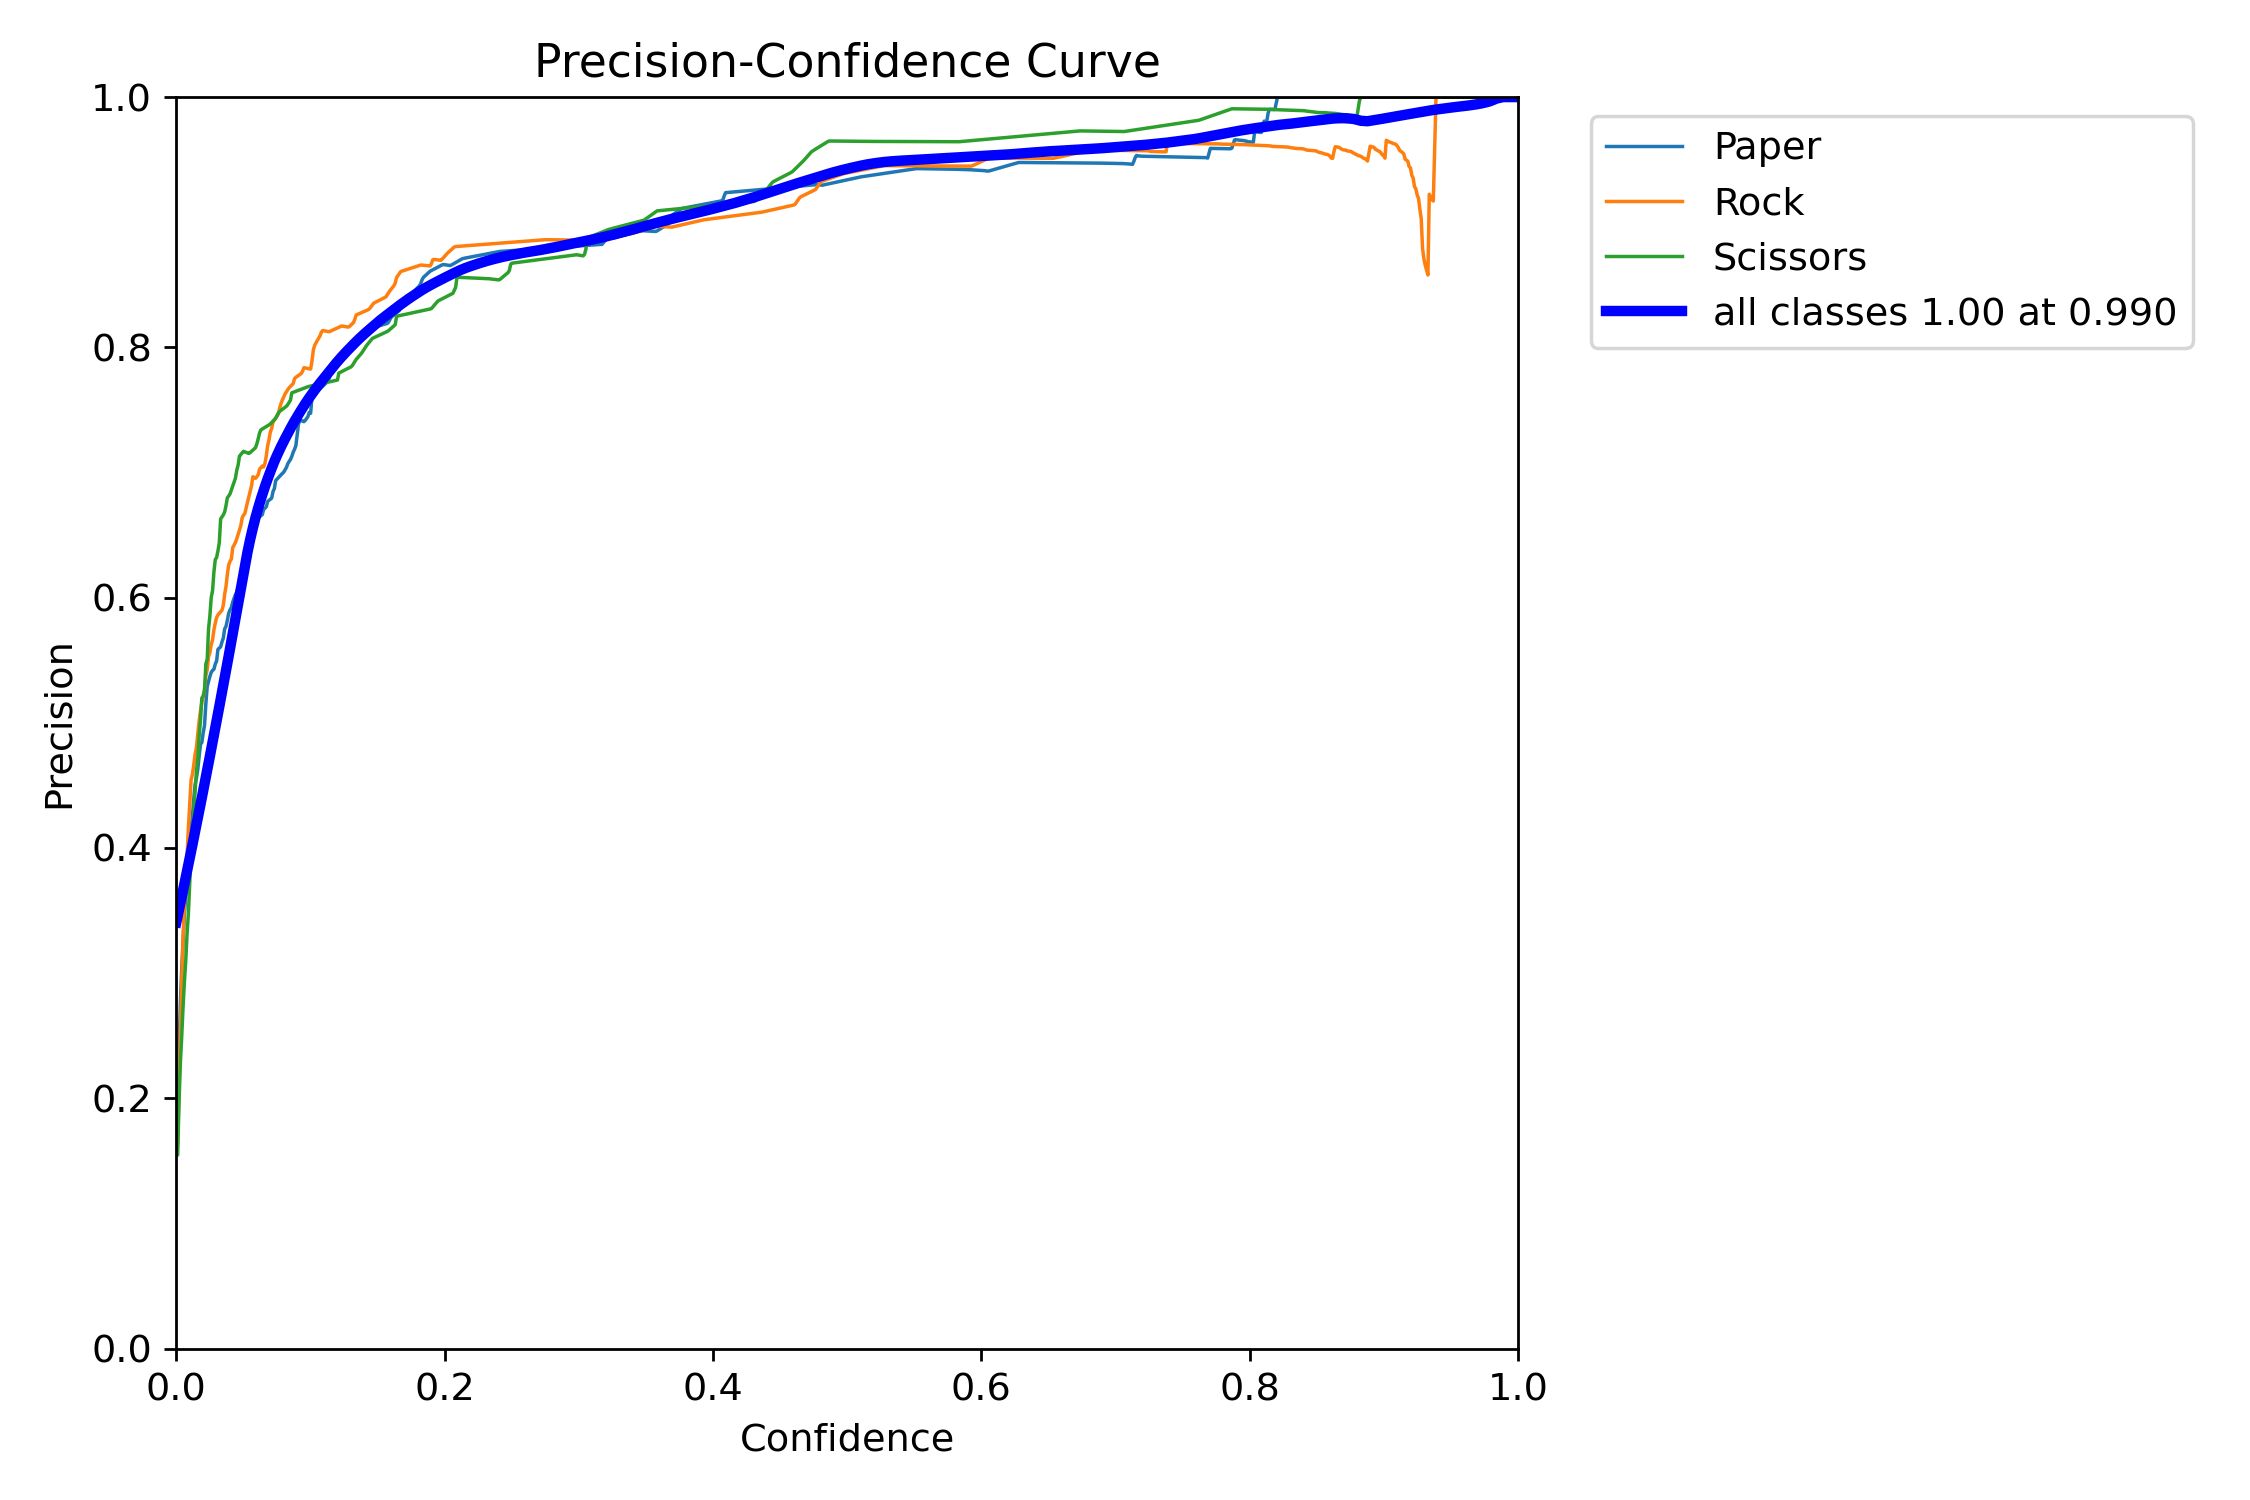

In [ ]:
Image("/content/runs/detect/train3/BoxP_curve.png")

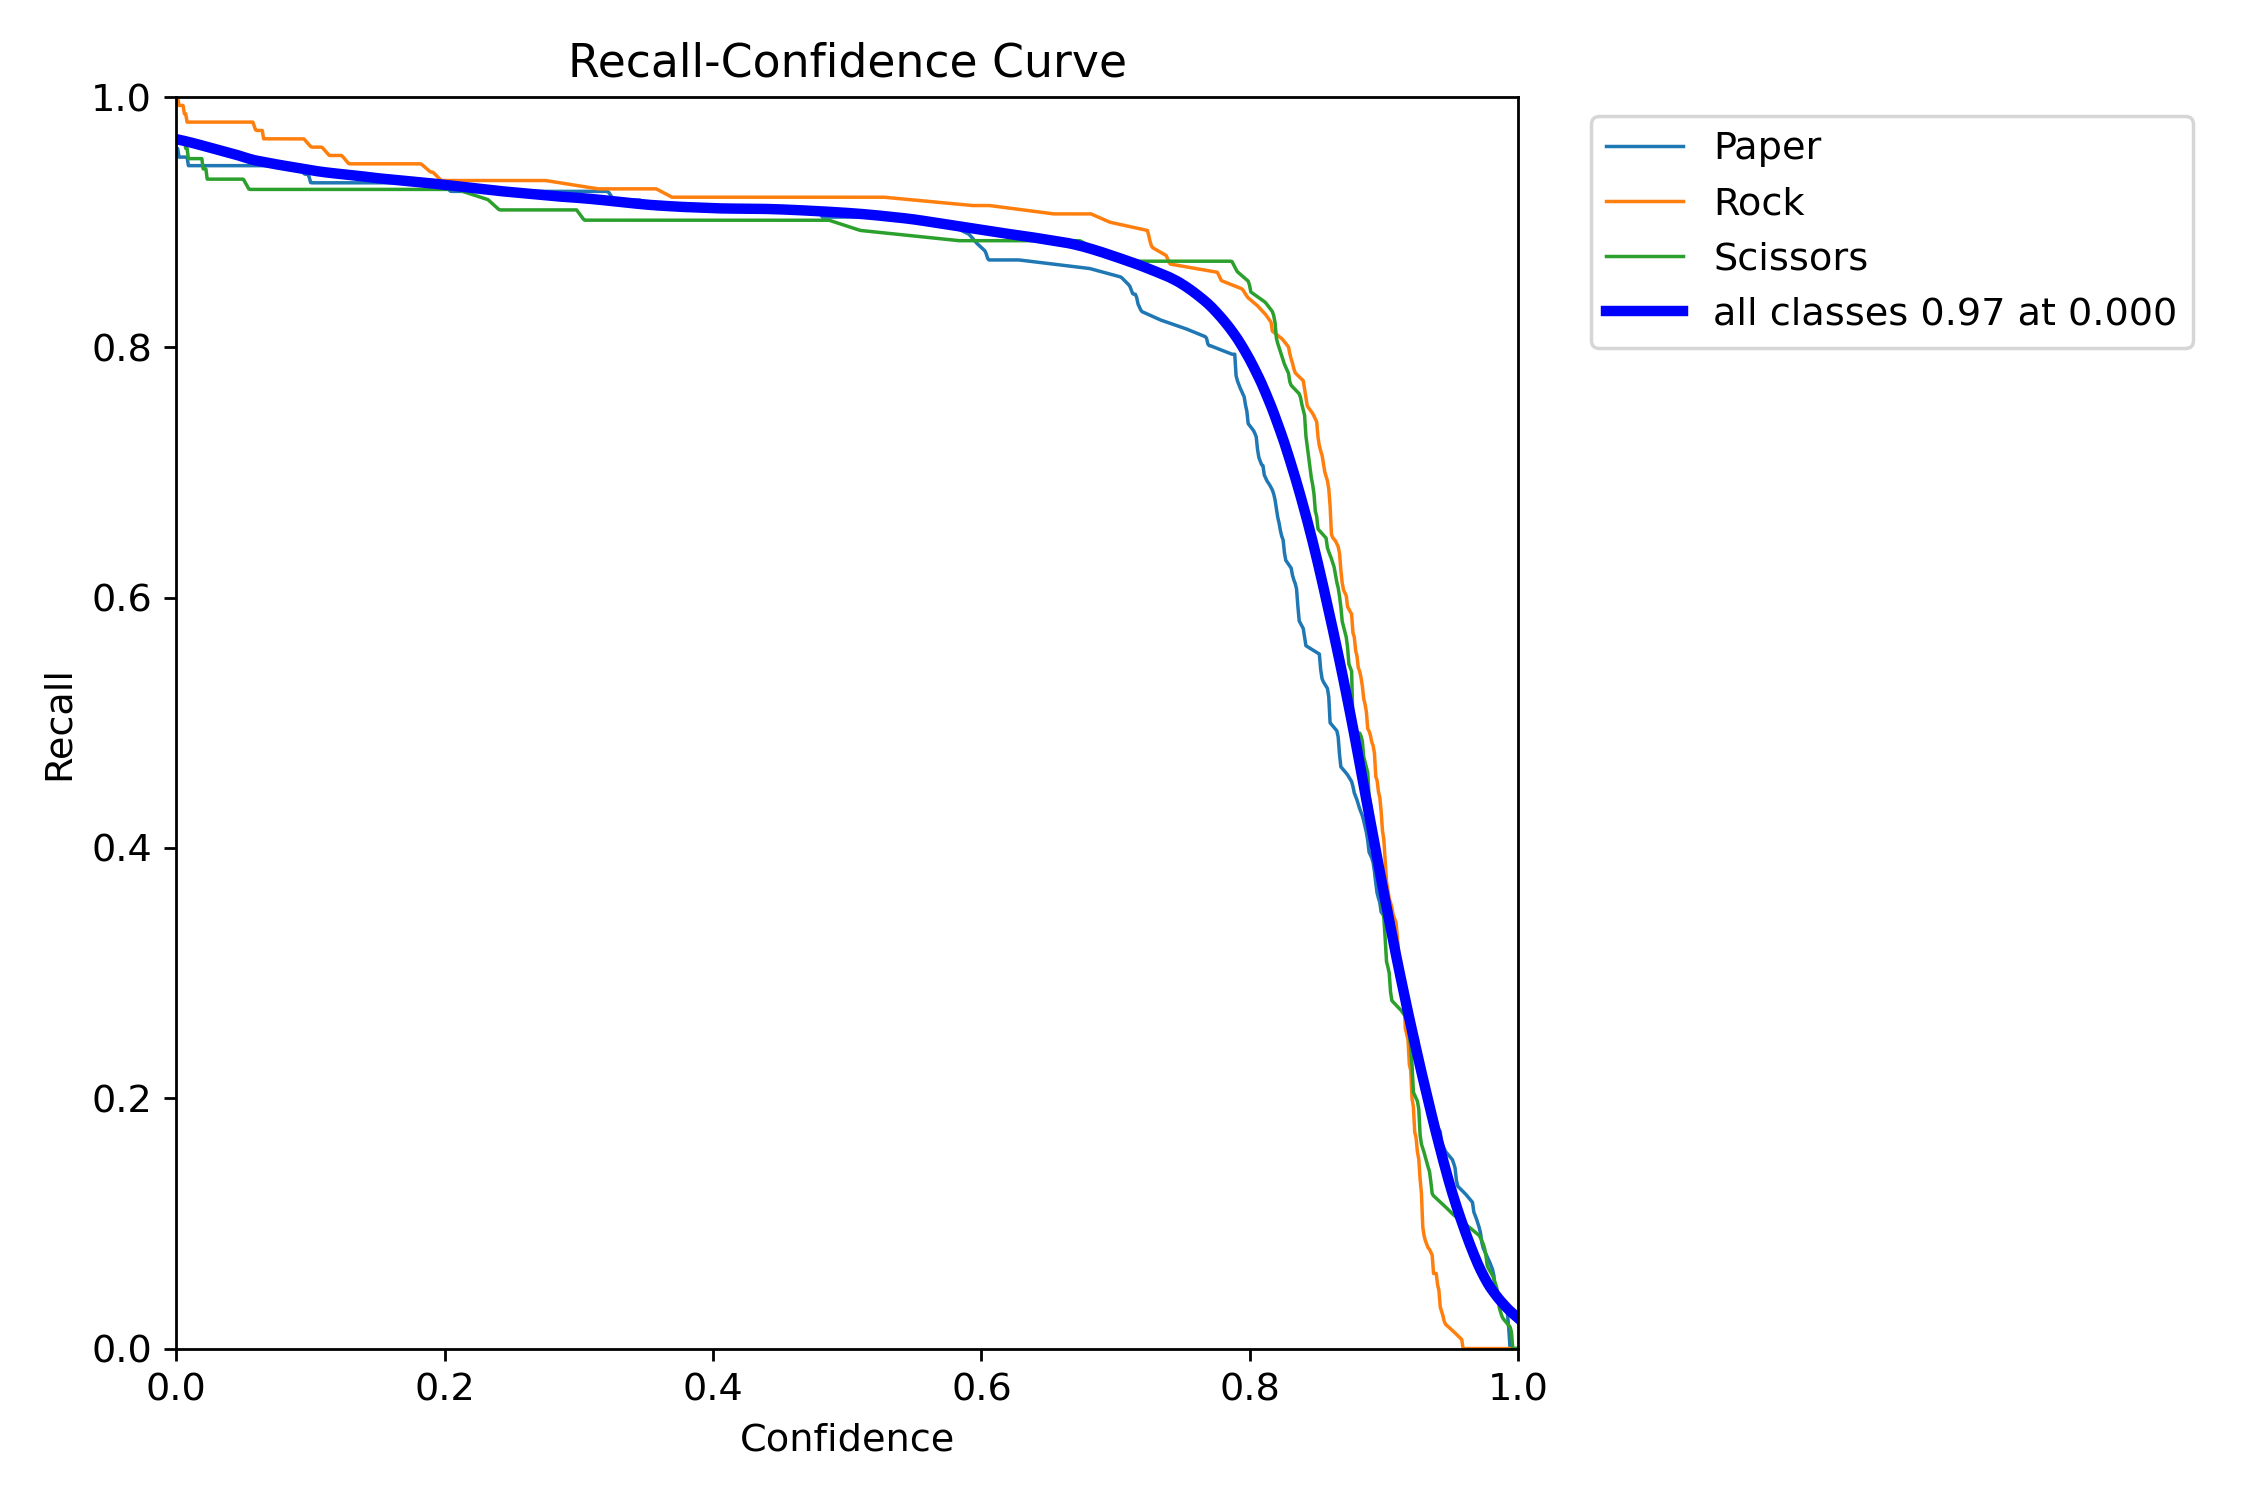

In [ ]:
Image("/content/runs/detect/train3/BoxR_curve.png")

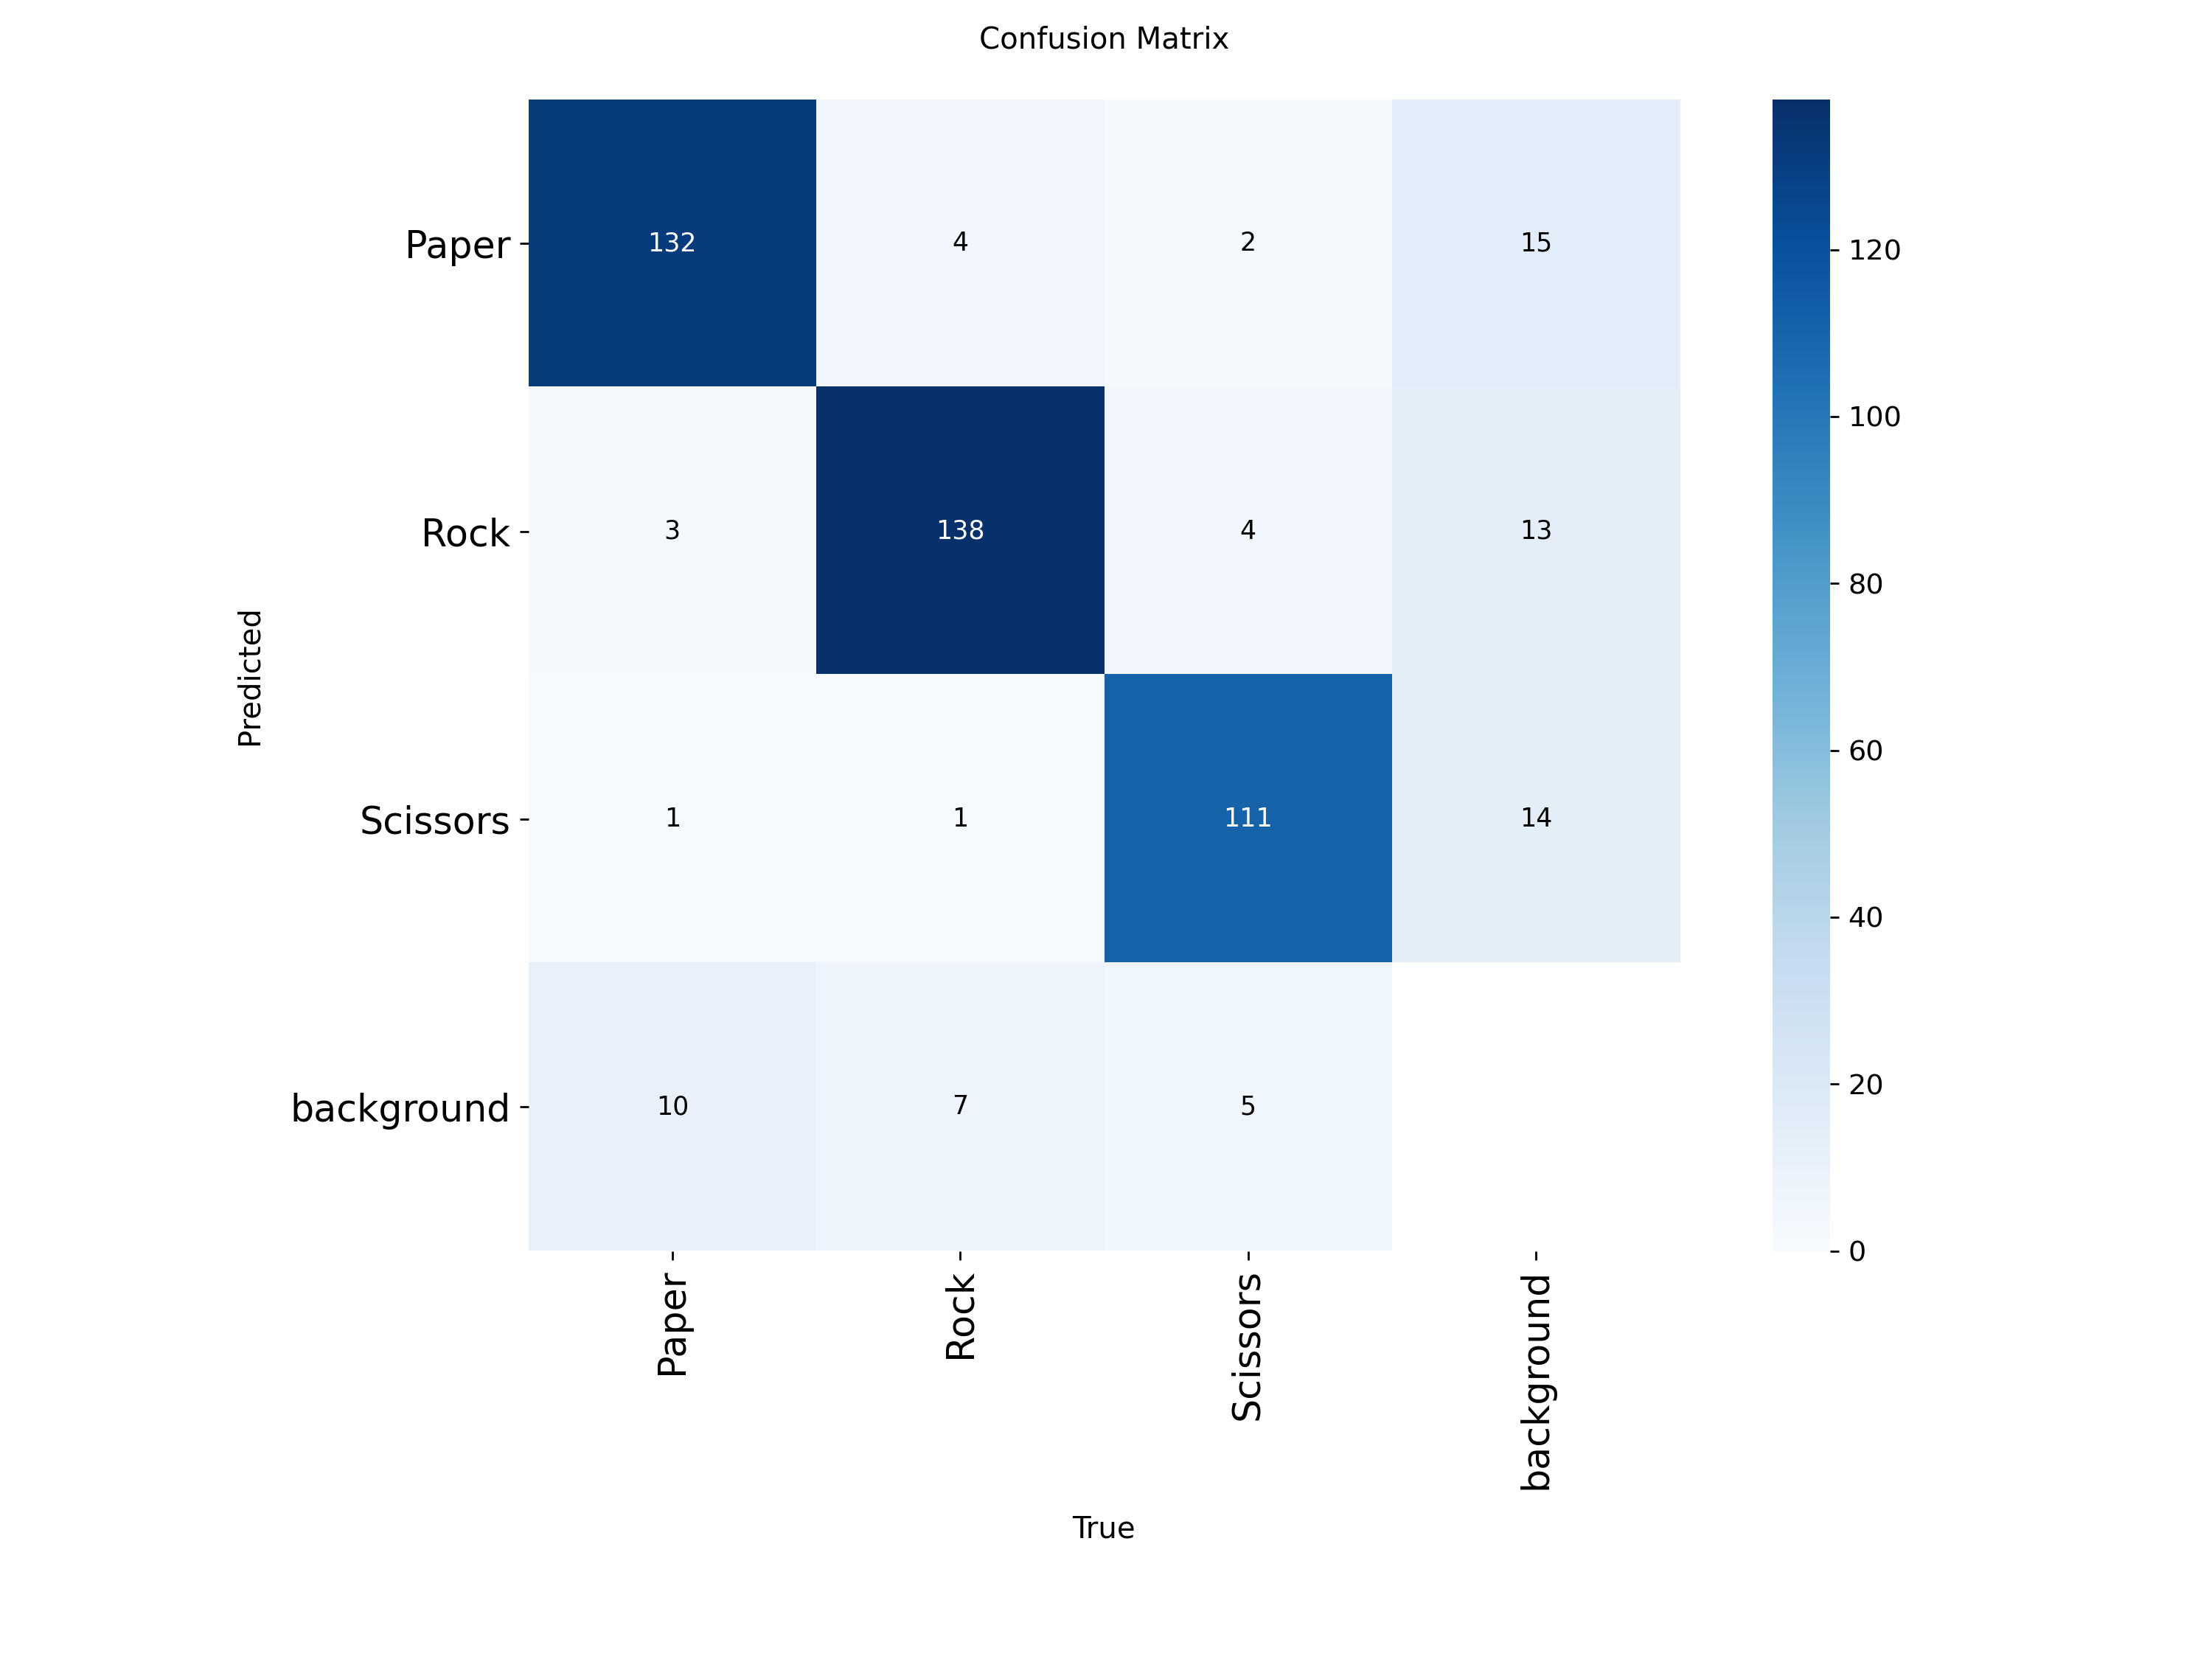

In [ ]:
Image("/content/runs/detect/train3/confusion_matrix.png")

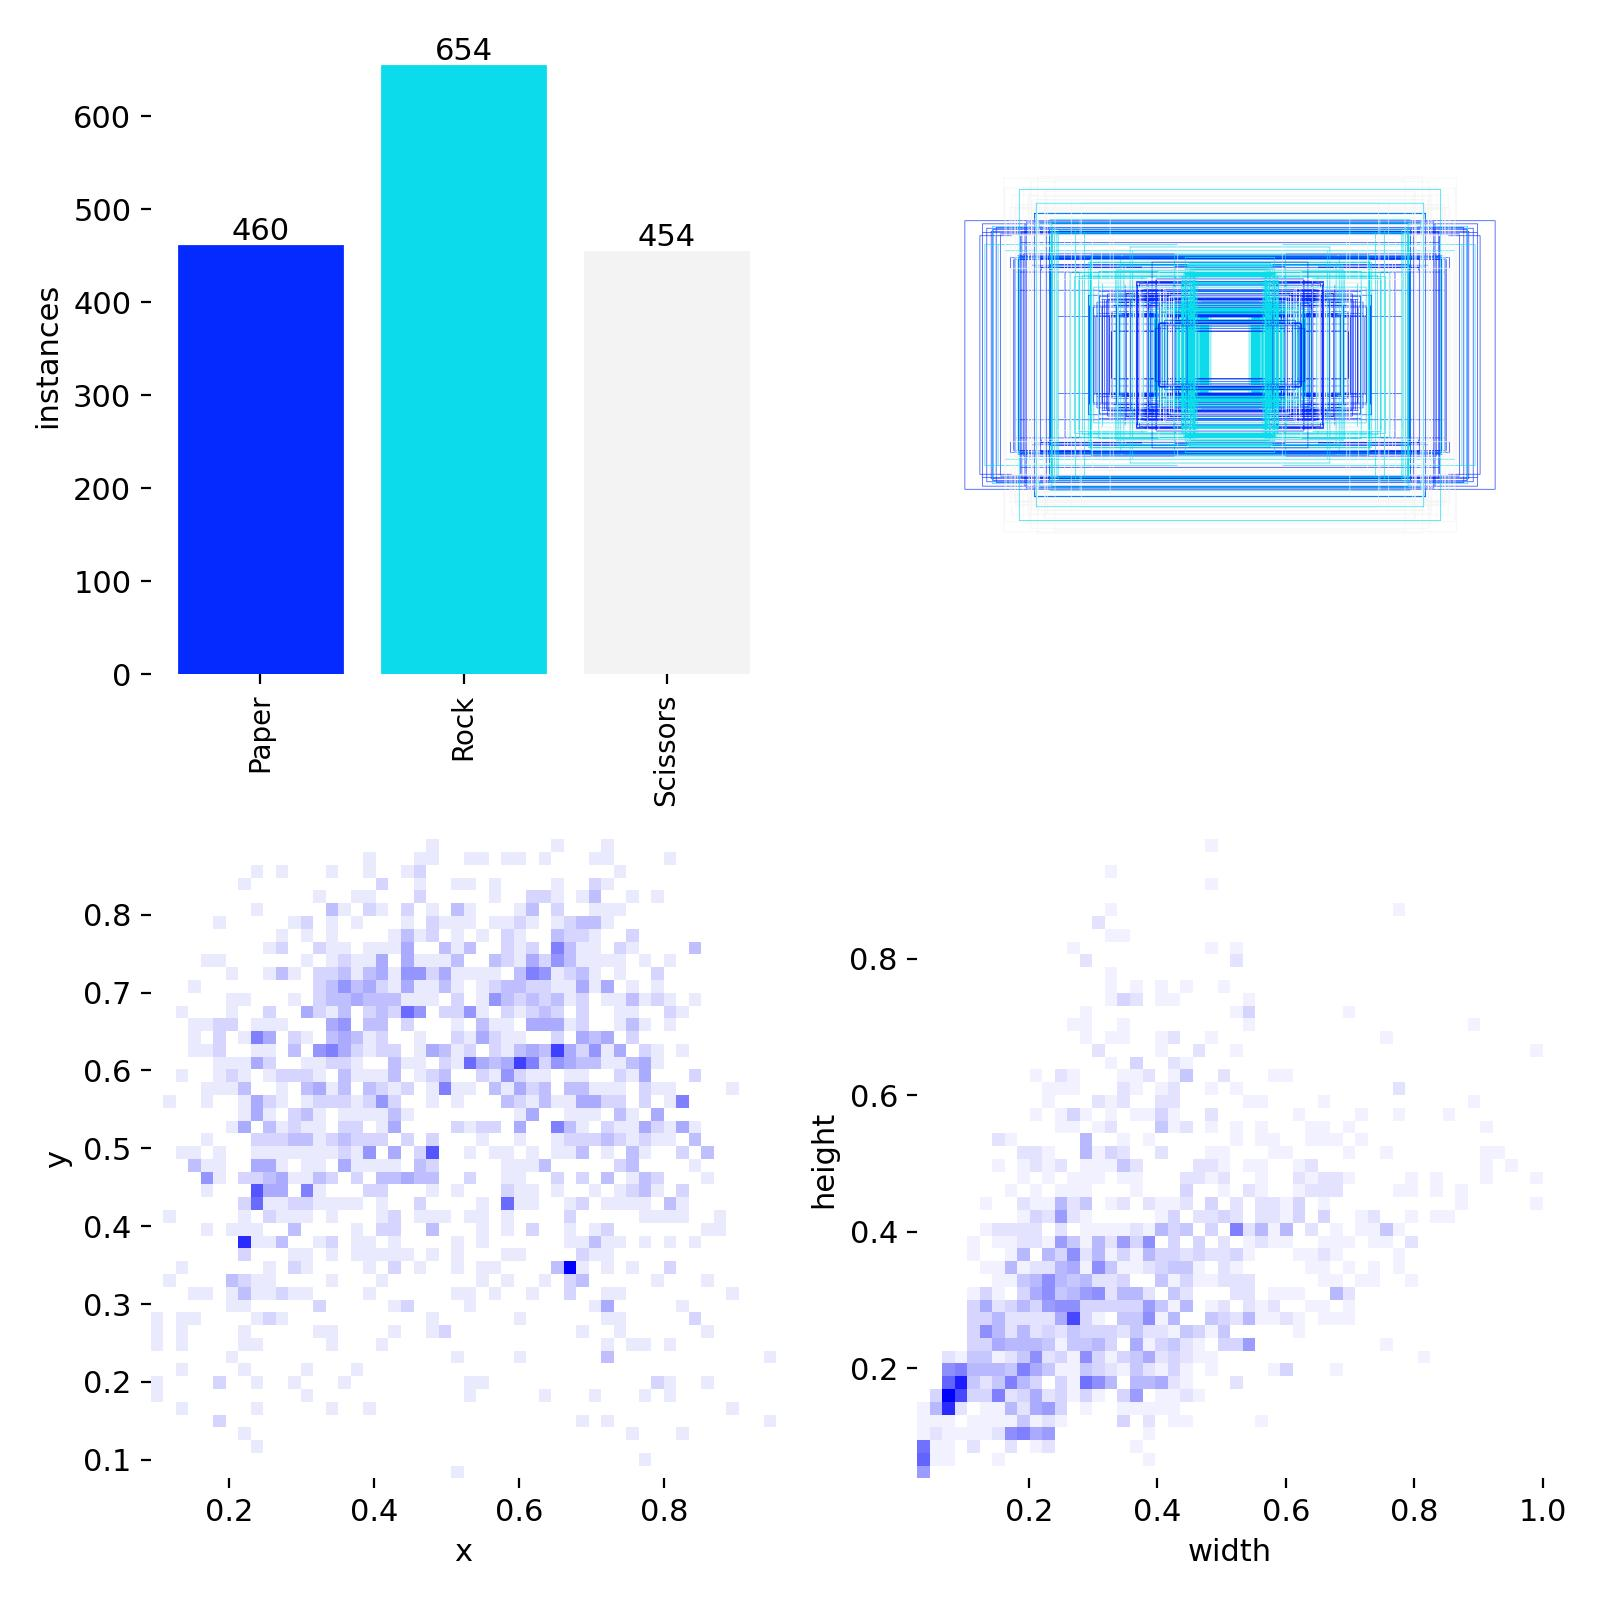

In [ ]:
Image("/content/runs/detect/train3/labels.jpg")

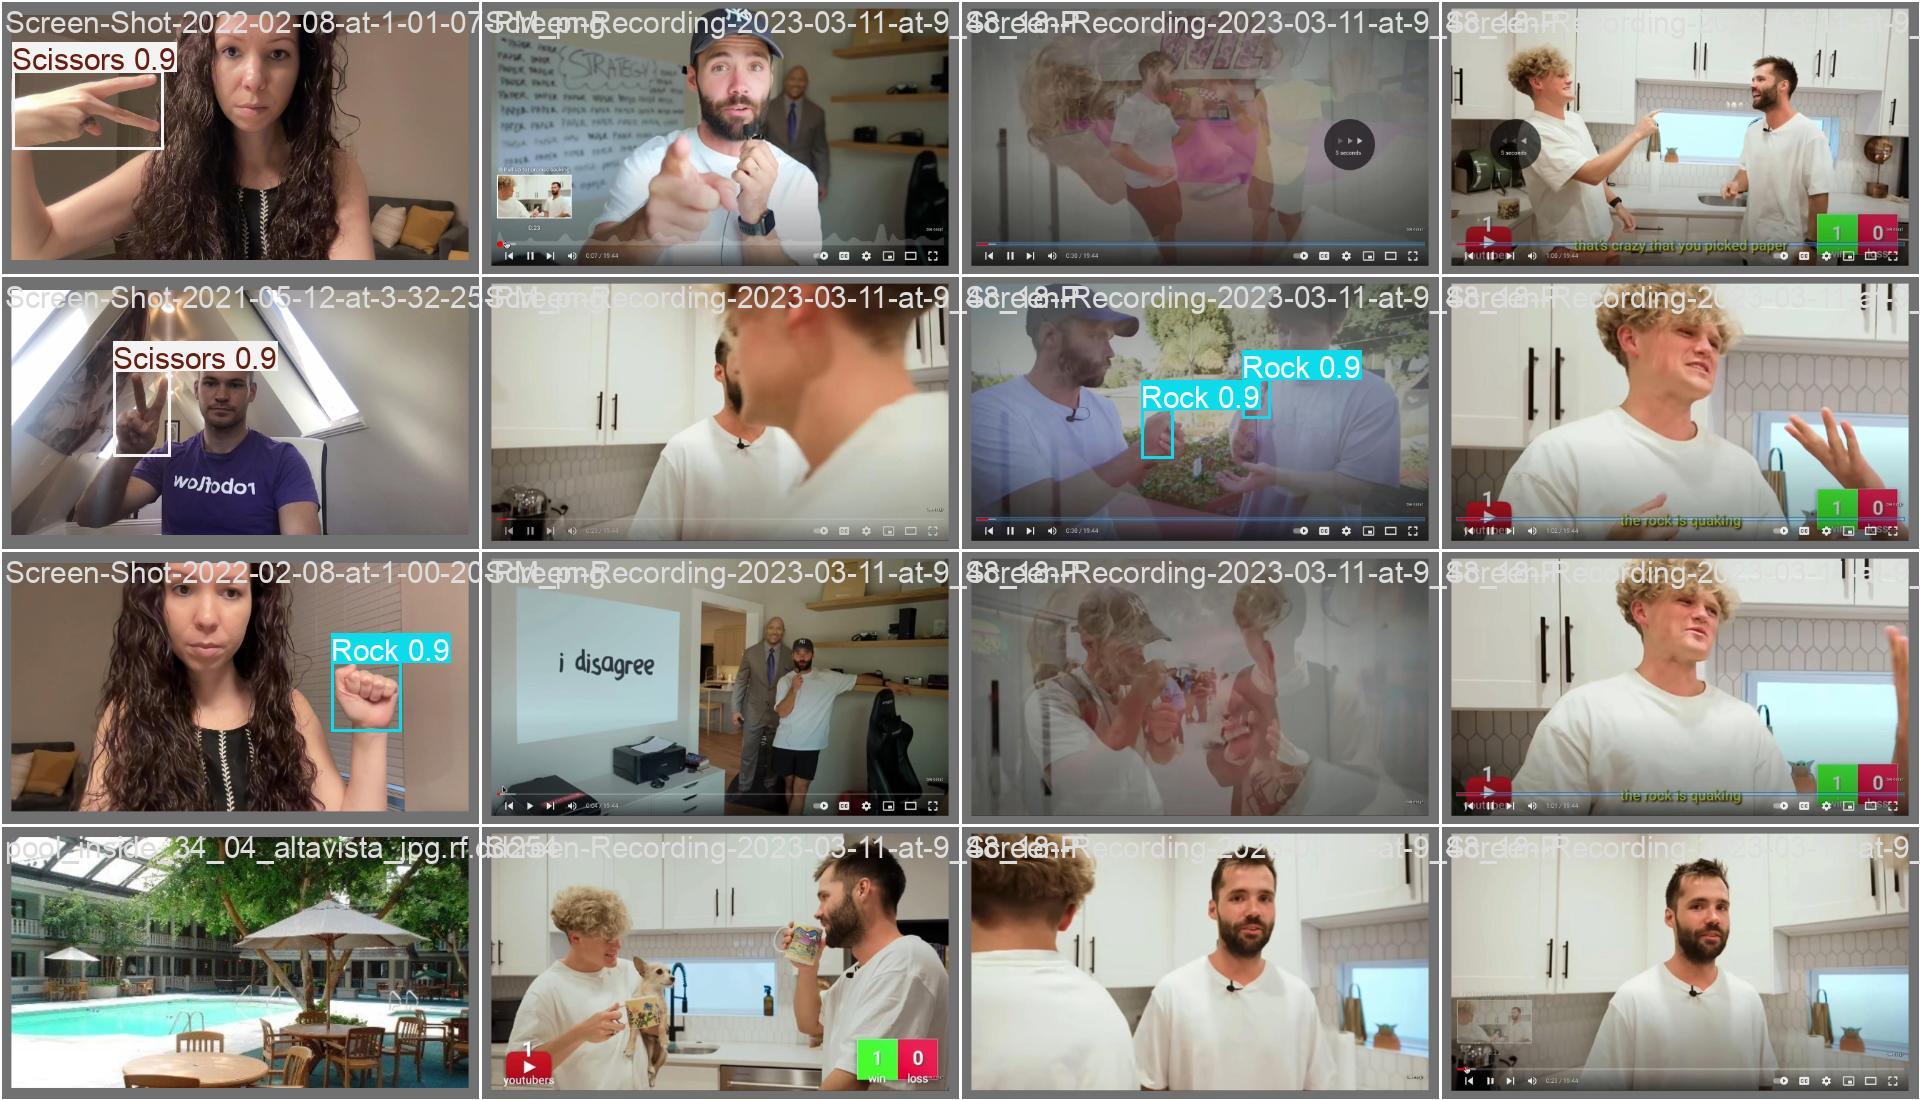

In [ ]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg")

In [ ]:
model.load("/content/runs/detect/train3/weights/best.pt")

Transferred 475/475 items from pretrained weights


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

In [ ]:
metrics = model.val()

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1700.3±853.2 MB/s, size: 66.1 KB)
val: Scanning /content/datasets/rock-paper-scissors-1/valid/labels.cache... 604 images, 251 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 604/604 1168523.8it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 38/38 3.4it/s 11.2s
                   all        604        418      0.948      0.905       0.94      0.749
                 Paper        139        146      0.934      0.904      0.938      0.758
                  Rock        128        150      0.945       0.92      0.941      0.715
              Scissors        118        122      0.965      0.892      0.941      0.773
Speed: 0.6ms preprocess, 13.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/d

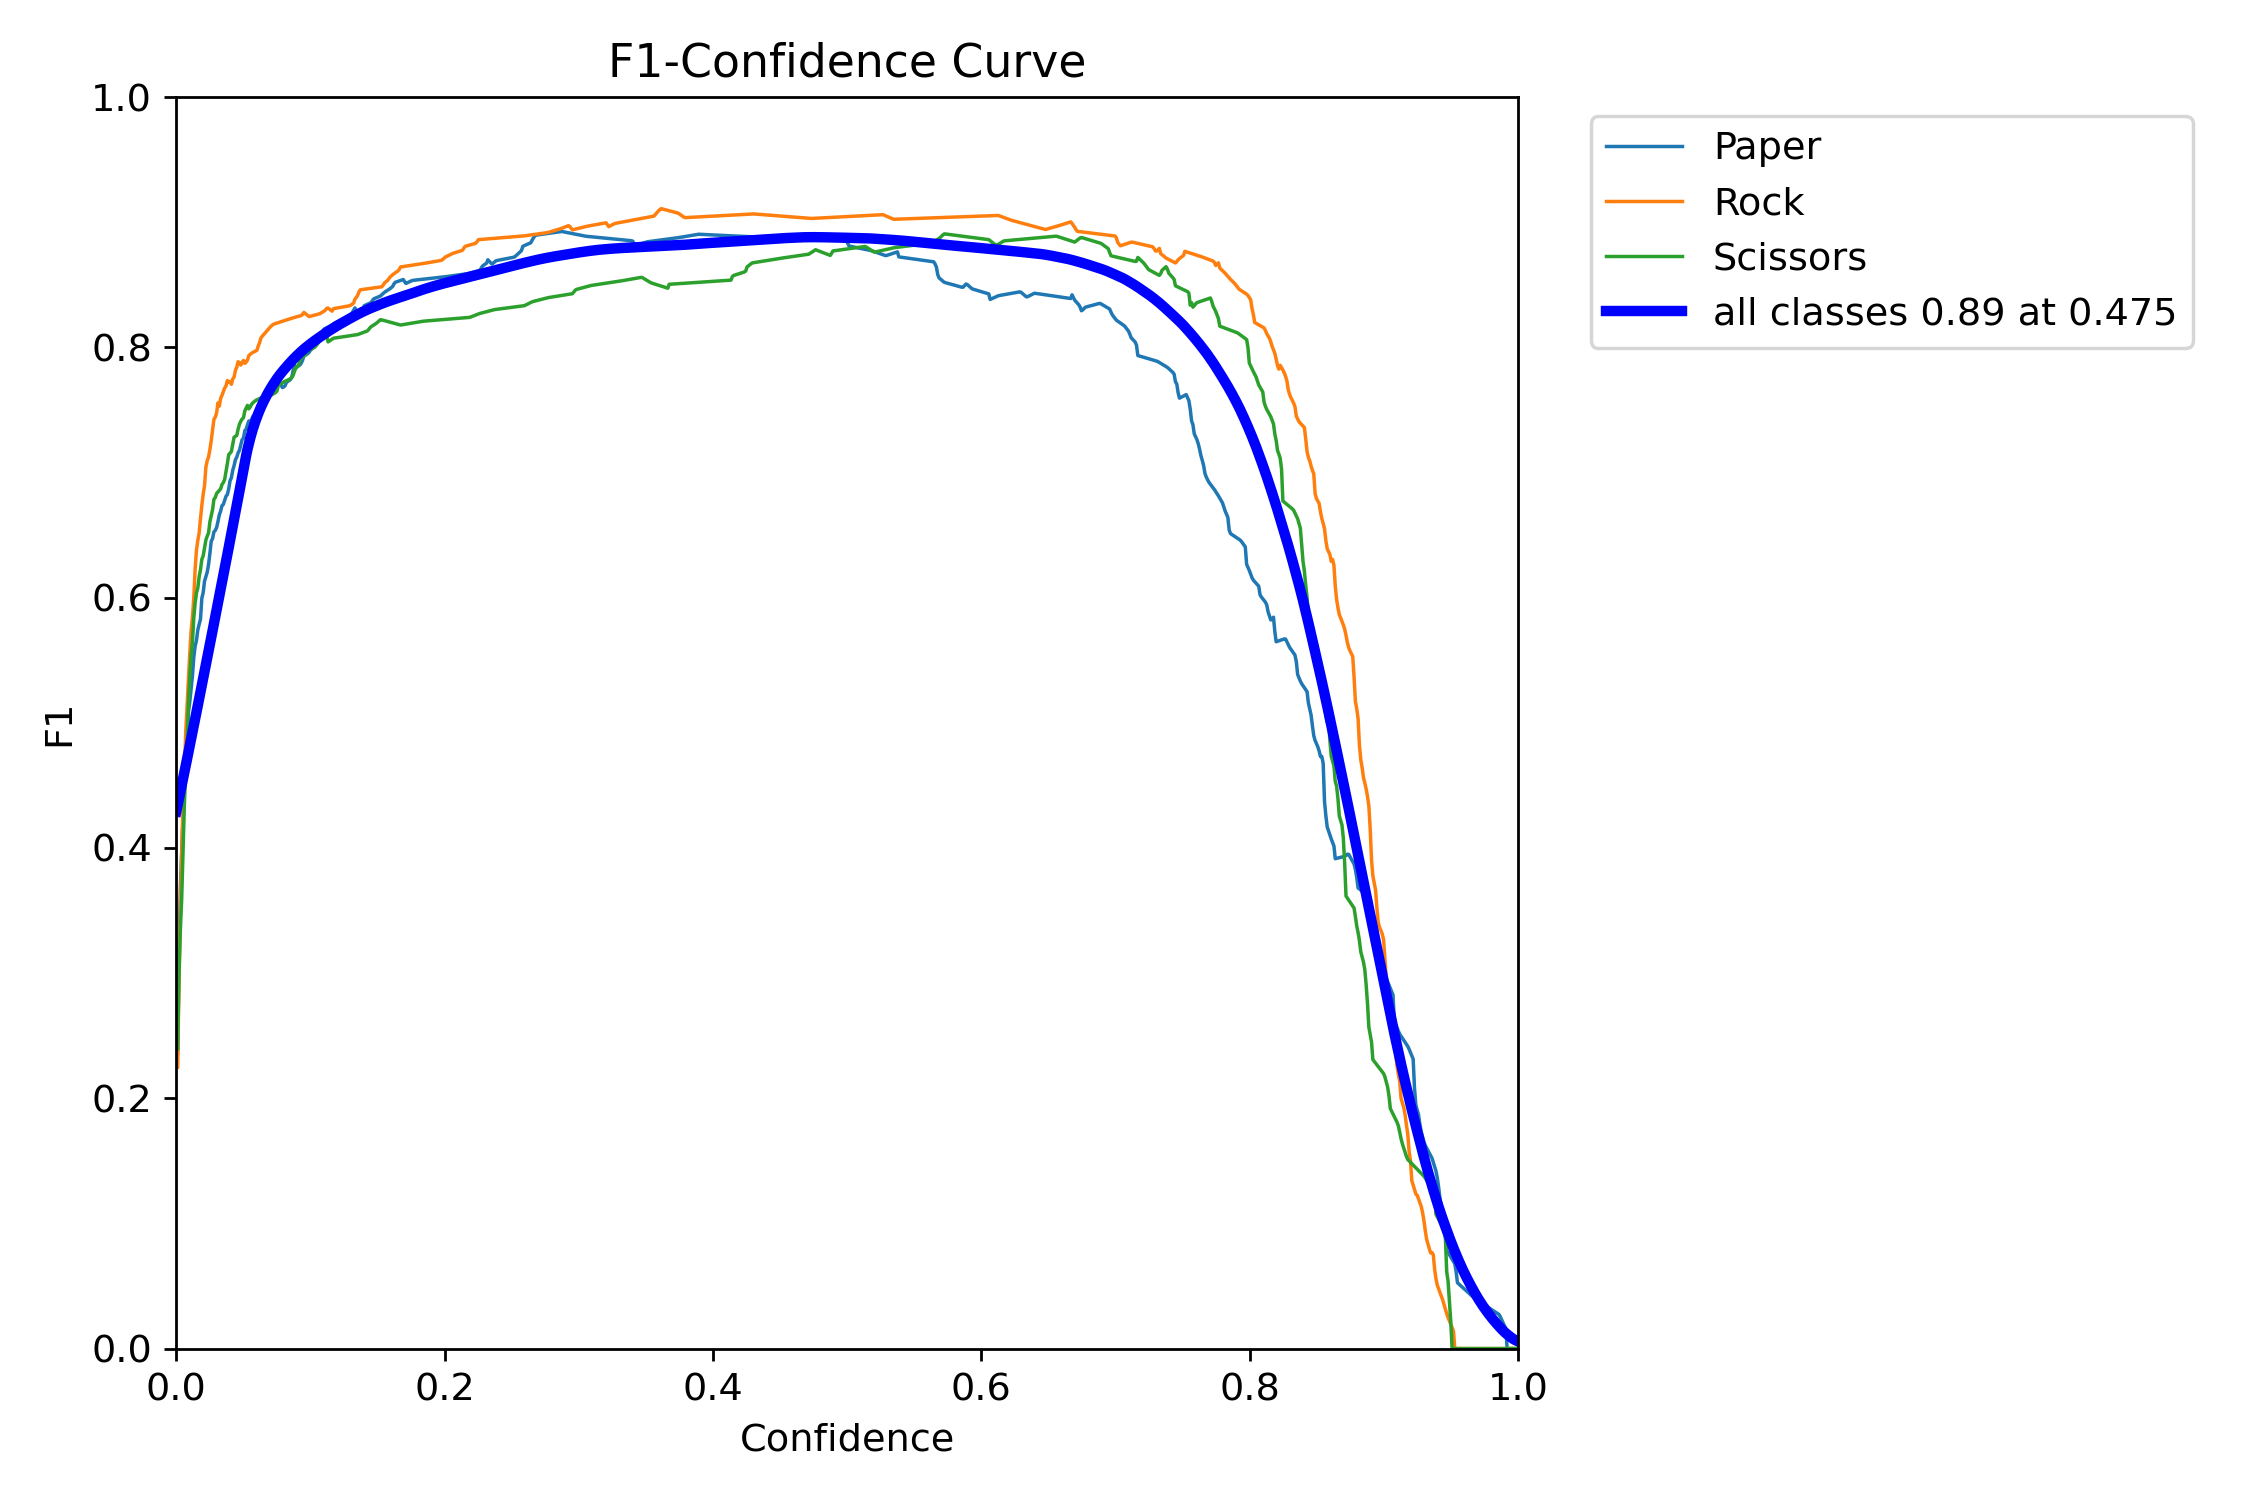

In [ ]:
Image("/content/runs/detect/train22/BoxF1_curve.png")

In [ ]:
s1 = "https://cdn.travelask.ru/uploads/post/000/019/134/main_image/full-af338ec36c511f607ea61bb94abb3de9.jpg"
result = model.predict(s1, save = True)


Found https://cdn.travelask.ru/uploads/post/000/019/134/main_image/full-af338ec36c511f607ea61bb94abb3de9.jpg locally at full-af338ec36c511f607ea61bb94abb3de9.jpg
image 1/1 /content/full-af338ec36c511f607ea61bb94abb3de9.jpg: 448x640 1 Paper, 1 Rock, 1 Scissors, 28.0ms
Speed: 3.4ms preprocess, 28.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/train33


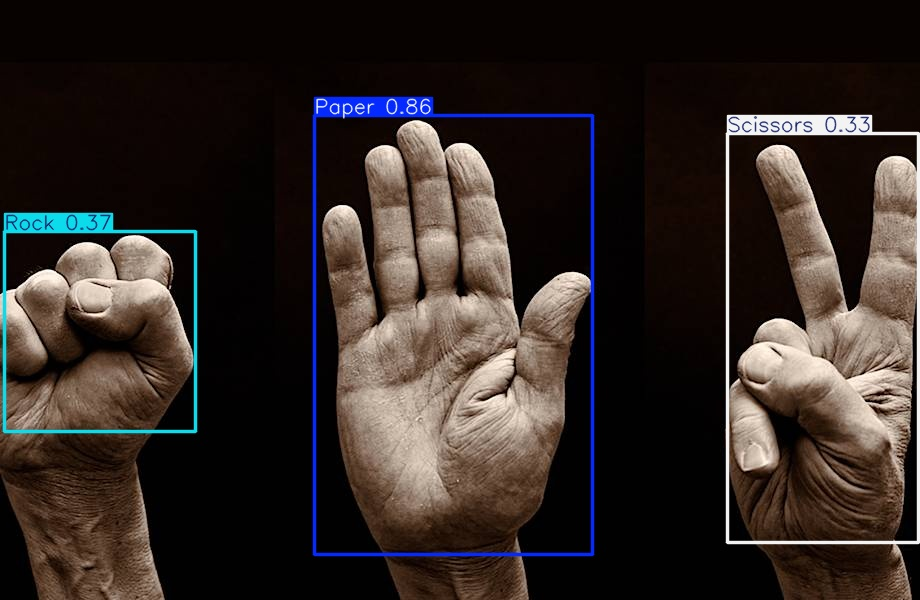

In [ ]:
Image("/content/runs/detect/train24/full-af338ec36c511f607ea61bb94abb3de9.jpg")